### Case Study: To predict the Energy output and exhaust vacuum for a Power Plant

### data link: 
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

#### Data set baic details: 
    
    The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load.

    A combined-cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. 
    
    In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. 
    
    While the Vacuum is collected from and has an effect on the Steam Turbine, the other three of the ambient variables affect the GT performance.

#### Attribute Information(Taken from above link):

    Features consist of hourly average ambient variables
    – Temperature (T) in the range 1.81°C and 37.11°C.
    – Ambient Pressure (AP) in the range 992.89-1033.30 millibar.
    – Relative Humidity (RH) in the range 25.56% to 100.16%.
    – Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg.
    – Net hourly electrical energy output (PE) 420.26-495.76 MW.

- 2 ways in which we can make neural n/w. 
- **Sequential model** for unimodal problems (1 type of data and single objective).

- **Functional model** we can have different o/p's in which functionalities r different.

One way to solve above problem is to create 2 Sequential models one to predict Energy output and other to predict exhaust vacuum and solve them one after the other.

Other way is to make a Functional Model since we want to predict 2 things. Functional model can be used to solve any 2 problems together e.g. it could be regression + regression or regression + classification or classification + classification etc

In [1]:
##import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
#pip install openpyxl

In [3]:
##import the dataset 

df = pd.read_excel('datasets/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


There is lot of difference in values of all features so we will have to use some normalizer to bring all features in a some range. V is in 10's, PE is in 100's & AP is in 1000's.

There are 2 o/p's in case of functional model, here we have Energy output and other to predict exhaust vacuum.

In [4]:
##define a function to get the outputs of the model

def get_outputs(data):
    y1 = data.pop('PE')
    y1 = np.array(y1)
    y2 = data.pop('V')
    y2 = np.array(y2)
    return y1, y2

## Split the data into train and test with 80 train / 20 test

In [5]:
train, test = train_test_split(df, test_size=0.2, random_state = 1)

### getting the outputs(PE) and (V) of the train and test data 

In [6]:
y_train = get_outputs(train)
y_test = get_outputs(test)

In [7]:
y_train

(array([484.32, 449.04, 471.86, ..., 462.56, 450.37, 452.94]),
 array([38.91, 65.61, 39.61, ..., 39.54, 45.01, 49.69]))

### Scaling the inputs

In [8]:
min_max=MinMaxScaler()
X_train=min_max.fit_transform(train)
X_test=min_max.transform(test)

In [9]:
X_train.shape

(7654, 3)

In [10]:
X_test.shape

(1914, 3)

### Building a neural network using functional API  
    Target vectors: Net hourly electrical energy output (PE) and Exhaust Vacuum (V) 
    Input variables: Temperature (T), Ambient Pressure (AP) and Relative Humidity (RH)

We have 3 I/P and 2 O/P and the in-between structure we have to define.

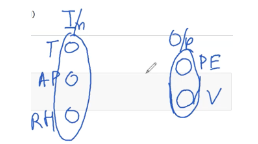

### Import the libraries for neural networks

In [11]:
from tensorflow.keras.models import Model  # Importing functional model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

#### Building the neural network
(Here we are using 2 hidden layers and one branched layer with 10 neurons each)

In Sequential model, i/p defined inside 1st hidden layer however in functional model i/p layer defined seperately.

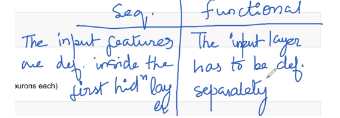

In functional model every layer has a keyword, I/P layer has keyword Input, dense has keyword Dense, convolution layer has keyword Conv2D etc

If using CNN for i/p image data can give higher order matrix input however if using ANN need to flatten image array to give as I/P. For tabular data anyways its a vector I/P.

In [12]:
##define input layer
input_layer = Input(shape=(3,),name='input_layer')

In [13]:
##Defining 2 hidden layers
Layer_1 = Dense(10, activation="relu",name='Layer_1')(input_layer)
Layer_2 = Dense(10, activation="relu",name='Layer_2')(Layer_1)
### Layer 1 is connected to the input layer and 
### Layer 2 is connected to the Layer 1

2023-04-02 06:10:24.639383: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
##Defining  output layer y1
y1_output= Dense(1, activation="linear",name='y1_output')(Layer_2)
### The first output is connected to layer 2

In [15]:
##Defining Branched layer
Branched_layer=Dense(10, activation="relu",name='Branched_layer')(Layer_2)
### The branched layer is connected to Layer 2.

In [16]:
##Defining 2nd output layer y2
y2_output= Dense(1, activation="linear",name='y2_output')(Branched_layer)
### The second layer is connected to branched layer

For output1 we r having 2 hidden layers but since we think output2 is bit more complex so we make 3 hidden layers by adding 1 more hidden layer named as branched layer.

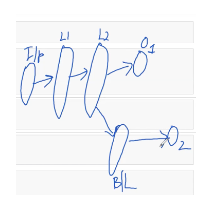

In [17]:
##Defining the model by specifying the input and output layers
model = Model(inputs=input_layer,outputs=[y1_output,y2_output])

This Model keyword tells compiler it is a Sequential model & we need to pass inputs & outputs.

### Model Summary

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 3)]          0           []                               
                                                                                                  
 Layer_1 (Dense)                (None, 10)           40          ['input_layer[0][0]']            
                                                                                                  
 Layer_2 (Dense)                (None, 10)           110         ['Layer_1[0][0]']                
                                                                                                  
 Branched_layer (Dense)         (None, 10)           110         ['Layer_2[0][0]']                
                                                                                              

### Visualizing the model

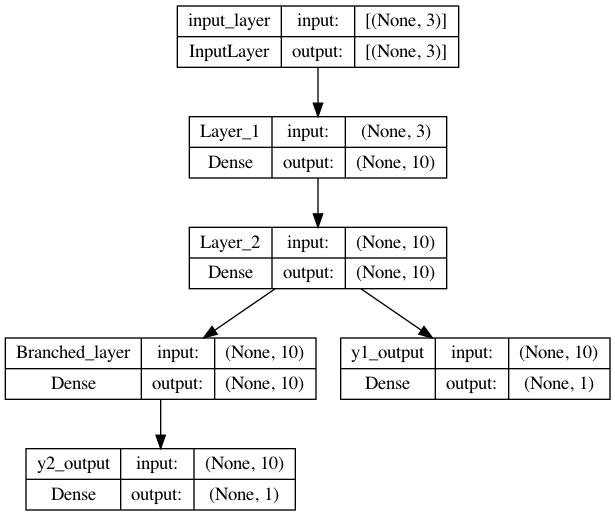

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
## defining the optimiser and loss function
model.compile(optimizer='adam',
              loss={'y1_output':'mse','y2_output':'mse'})  

# mse loss function since both o/p's of preduiction (continuous values)
# categorical crossentropy etc in case of classification o/p

In [21]:
##training the model

model.fit(X_train,y_train,
          epochs=300, 
          batch_size=128, 
          validation_data=(X_test,y_test))

Epoch 1/300
60/60 [==============================] - 1s 3ms/step - loss: 209720.3281 - y1_output_loss: 206611.3594 - y2_output_loss: 3109.0244 - val_loss: 209523.2812 - val_y1_output_loss: 206437.5625 - val_y2_output_loss: 3085.7336
Epoch 2/300
60/60 [==============================] - 0s 1ms/step - loss: 209169.4531 - y1_output_loss: 206109.8125 - y2_output_loss: 3059.6777 - val_loss: 208711.1875 - val_y1_output_loss: 205704.7344 - val_y2_output_loss: 3006.4561
Epoch 3/300
60/60 [==============================] - 0s 1ms/step - loss: 207821.9375 - y1_output_loss: 204902.3594 - y2_output_loss: 2919.5342 - val_loss: 206692.0469 - val_y1_output_loss: 203913.7188 - val_y2_output_loss: 2778.3594
Epoch 4/300
60/60 [==============================] - 0s 1ms/step - loss: 205008.2500 - y1_output_loss: 202451.2656 - y2_output_loss: 2557.0237 - val_loss: 202991.8438 - val_y1_output_loss: 200736.4844 - val_y2_output_loss: 2255.3931
Epoch 5/300
60/60 [==============================] - 0s 1ms/step - l

Epoch 37/300
60/60 [==============================] - 0s 987us/step - loss: 1642.7440 - y1_output_loss: 1496.4688 - y2_output_loss: 146.2752 - val_loss: 1601.3562 - val_y1_output_loss: 1455.3276 - val_y2_output_loss: 146.0283
Epoch 38/300
60/60 [==============================] - 0s 981us/step - loss: 1636.1355 - y1_output_loss: 1489.5712 - y2_output_loss: 146.5643 - val_loss: 1594.3008 - val_y1_output_loss: 1448.0198 - val_y2_output_loss: 146.2812
Epoch 39/300
60/60 [==============================] - 0s 983us/step - loss: 1629.5735 - y1_output_loss: 1482.5388 - y2_output_loss: 147.0347 - val_loss: 1587.1903 - val_y1_output_loss: 1440.6283 - val_y2_output_loss: 146.5620
Epoch 40/300
60/60 [==============================] - 0s 985us/step - loss: 1622.6833 - y1_output_loss: 1475.4746 - y2_output_loss: 147.2086 - val_loss: 1580.1246 - val_y1_output_loss: 1433.3190 - val_y2_output_loss: 146.8059
Epoch 41/300
60/60 [==============================] - 0s 986us/step - loss: 1615.7640 - y1_outpu

60/60 [==============================] - 0s 990us/step - loss: 1341.7056 - y1_output_loss: 1202.3943 - y2_output_loss: 139.3116 - val_loss: 1284.7345 - val_y1_output_loss: 1147.2092 - val_y2_output_loss: 137.5253
Epoch 74/300
60/60 [==============================] - 0s 995us/step - loss: 1331.0593 - y1_output_loss: 1193.2876 - y2_output_loss: 137.7717 - val_loss: 1274.0413 - val_y1_output_loss: 1138.0428 - val_y2_output_loss: 135.9984
Epoch 75/300
60/60 [==============================] - 0s 992us/step - loss: 1320.6952 - y1_output_loss: 1184.0590 - y2_output_loss: 136.6365 - val_loss: 1263.2042 - val_y1_output_loss: 1128.6372 - val_y2_output_loss: 134.5671
Epoch 76/300
60/60 [==============================] - 0s 994us/step - loss: 1309.4124 - y1_output_loss: 1174.5382 - y2_output_loss: 134.8739 - val_loss: 1251.7881 - val_y1_output_loss: 1118.5398 - val_y2_output_loss: 133.2483
Epoch 77/300
60/60 [==============================] - 0s 991us/step - loss: 1298.0599 - y1_output_loss: 1165.

Epoch 110/300
60/60 [==============================] - 0s 1ms/step - loss: 843.0424 - y1_output_loss: 790.1231 - y2_output_loss: 52.9193 - val_loss: 786.7640 - val_y1_output_loss: 735.0842 - val_y2_output_loss: 51.6798
Epoch 111/300
60/60 [==============================] - 0s 991us/step - loss: 828.8578 - y1_output_loss: 776.6675 - y2_output_loss: 52.1904 - val_loss: 774.6979 - val_y1_output_loss: 721.8430 - val_y2_output_loss: 52.8549
Epoch 112/300
60/60 [==============================] - 0s 1ms/step - loss: 814.9681 - y1_output_loss: 763.1065 - y2_output_loss: 51.8616 - val_loss: 759.1399 - val_y1_output_loss: 708.2421 - val_y2_output_loss: 50.8978
Epoch 113/300
60/60 [==============================] - 0s 1ms/step - loss: 799.1669 - y1_output_loss: 748.1895 - y2_output_loss: 50.9774 - val_loss: 745.6633 - val_y1_output_loss: 695.3064 - val_y2_output_loss: 50.3568
Epoch 114/300
60/60 [==============================] - 0s 987us/step - loss: 785.1234 - y1_output_loss: 734.2870 - y2_outp

60/60 [==============================] - 0s 1ms/step - loss: 273.0682 - y1_output_loss: 231.2444 - y2_output_loss: 41.8237 - val_loss: 247.7679 - val_y1_output_loss: 206.4826 - val_y2_output_loss: 41.2853
Epoch 148/300
60/60 [==============================] - 0s 1ms/step - loss: 259.1505 - y1_output_loss: 217.6720 - y2_output_loss: 41.4786 - val_loss: 236.2238 - val_y1_output_loss: 194.1739 - val_y2_output_loss: 42.0499
Epoch 149/300
60/60 [==============================] - 0s 1ms/step - loss: 245.8267 - y1_output_loss: 204.4442 - y2_output_loss: 41.3825 - val_loss: 224.2487 - val_y1_output_loss: 182.4321 - val_y2_output_loss: 41.8166
Epoch 150/300
60/60 [==============================] - 0s 998us/step - loss: 233.3824 - y1_output_loss: 192.2923 - y2_output_loss: 41.0902 - val_loss: 211.5212 - val_y1_output_loss: 170.5453 - val_y2_output_loss: 40.9758
Epoch 151/300
60/60 [==============================] - 0s 1ms/step - loss: 220.4820 - y1_output_loss: 179.5758 - y2_output_loss: 40.9062

Epoch 185/300
60/60 [==============================] - 0s 1ms/step - loss: 59.0571 - y1_output_loss: 23.8454 - y2_output_loss: 35.2116 - val_loss: 57.7059 - val_y1_output_loss: 22.5320 - val_y2_output_loss: 35.1739
Epoch 186/300
60/60 [==============================] - 0s 990us/step - loss: 58.8780 - y1_output_loss: 23.6748 - y2_output_loss: 35.2032 - val_loss: 57.2175 - val_y1_output_loss: 22.3677 - val_y2_output_loss: 34.8498
Epoch 187/300
60/60 [==============================] - 0s 990us/step - loss: 58.6091 - y1_output_loss: 23.6110 - y2_output_loss: 34.9981 - val_loss: 57.6101 - val_y1_output_loss: 22.4529 - val_y2_output_loss: 35.1572
Epoch 188/300
60/60 [==============================] - 0s 983us/step - loss: 58.5073 - y1_output_loss: 23.5416 - y2_output_loss: 34.9657 - val_loss: 57.3133 - val_y1_output_loss: 22.3632 - val_y2_output_loss: 34.9501
Epoch 189/300
60/60 [==============================] - 0s 992us/step - loss: 58.5704 - y1_output_loss: 23.5012 - y2_output_loss: 35.06

Epoch 223/300
60/60 [==============================] - 0s 1ms/step - loss: 58.1015 - y1_output_loss: 23.2707 - y2_output_loss: 34.8308 - val_loss: 57.0090 - val_y1_output_loss: 22.4973 - val_y2_output_loss: 34.5117
Epoch 224/300
60/60 [==============================] - 0s 995us/step - loss: 58.2343 - y1_output_loss: 23.3722 - y2_output_loss: 34.8621 - val_loss: 58.1793 - val_y1_output_loss: 23.2611 - val_y2_output_loss: 34.9183
Epoch 225/300
60/60 [==============================] - 0s 989us/step - loss: 58.2206 - y1_output_loss: 23.4148 - y2_output_loss: 34.8058 - val_loss: 56.9421 - val_y1_output_loss: 22.3828 - val_y2_output_loss: 34.5593
Epoch 226/300
60/60 [==============================] - 0s 1ms/step - loss: 58.0343 - y1_output_loss: 23.3391 - y2_output_loss: 34.6952 - val_loss: 57.3167 - val_y1_output_loss: 22.2144 - val_y2_output_loss: 35.1023
Epoch 227/300
60/60 [==============================] - 0s 1ms/step - loss: 58.1940 - y1_output_loss: 23.3297 - y2_output_loss: 34.8643 -

Epoch 261/300
60/60 [==============================] - 0s 993us/step - loss: 58.1528 - y1_output_loss: 23.3120 - y2_output_loss: 34.8408 - val_loss: 57.0161 - val_y1_output_loss: 22.2223 - val_y2_output_loss: 34.7938
Epoch 262/300
60/60 [==============================] - 0s 989us/step - loss: 58.4931 - y1_output_loss: 23.3126 - y2_output_loss: 35.1805 - val_loss: 56.7981 - val_y1_output_loss: 22.3118 - val_y2_output_loss: 34.4863
Epoch 263/300
60/60 [==============================] - 0s 989us/step - loss: 58.0171 - y1_output_loss: 23.2881 - y2_output_loss: 34.7289 - val_loss: 56.8038 - val_y1_output_loss: 22.2250 - val_y2_output_loss: 34.5788
Epoch 264/300
60/60 [==============================] - 0s 995us/step - loss: 58.3131 - y1_output_loss: 23.4121 - y2_output_loss: 34.9010 - val_loss: 56.7417 - val_y1_output_loss: 22.2265 - val_y2_output_loss: 34.5153
Epoch 265/300
60/60 [==============================] - 0s 993us/step - loss: 58.0752 - y1_output_loss: 23.3031 - y2_output_loss: 34.

Epoch 299/300
60/60 [==============================] - 0s 985us/step - loss: 58.1942 - y1_output_loss: 23.3854 - y2_output_loss: 34.8088 - val_loss: 58.2121 - val_y1_output_loss: 23.2409 - val_y2_output_loss: 34.9712
Epoch 300/300
60/60 [==============================] - 0s 992us/step - loss: 58.2016 - y1_output_loss: 23.5830 - y2_output_loss: 34.6186 - val_loss: 57.1868 - val_y1_output_loss: 22.2551 - val_y2_output_loss: 34.9317


In [22]:
##model predictions
predictions = model.predict(X_test)
predicted_energy=predictions[0]
predicted_vacuum=predictions[1]

60/60 [==============================] - 0s 473us/step


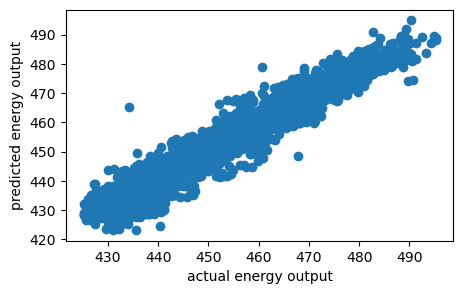

In [23]:
##Plotting actual vs predicted energy
plt.figure(figsize=(5,3))
plt.scatter(y_test[0],predicted_energy)
plt.xlabel('actual energy output')
plt.ylabel('predicted energy output');

So Actual and Predicted o/p are in sync (linear) as expected.

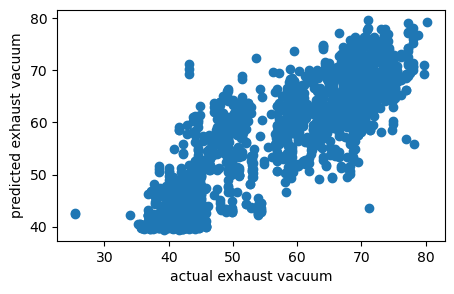

In [24]:
##Plotting actual vs predicted exhaust vacuum
plt.figure(figsize=(5,3))

plt.scatter(y_test[1],predicted_vacuum)
plt.xlabel('actual exhaust vacuum')
plt.ylabel('predicted exhaust vacuum');